In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.protobuf.internal.well_known_types import Duration  





1. Loading the Dataset

In [2]:

df = pd.read_csv('Scraped_dataset.csv')
print(df.head())


  Date of Booking Date of Journey                Airline-Class Departure Time  \
0      15/01/2023      16/01/2023  SpiceJet \nSG-8169\nECONOMY   20:00\nDelhi   
1      15/01/2023      16/01/2023    Indigo \n6E-2519\nECONOMY   23:00\nDelhi   
2      15/01/2023      16/01/2023  GO FIRST \nG8- 354\nECONOMY   22:30\nDelhi   
3      15/01/2023      16/01/2023  SpiceJet \nSG-8709\nECONOMY   18:50\nDelhi   
4      15/01/2023      16/01/2023  Air India \nAI-805\nECONOMY   20:00\nDelhi   

    Arrival Time Duration Total Stops  Price  
0  22:05\nMumbai  02h 05m    non-stop  5,335  
1  01:20\nMumbai  02h 20m    non-stop  5,899  
2  00:40\nMumbai  02h 10m    non-stop  5,801  
3  20:55\nMumbai  02h 05m    non-stop  5,794  
4  22:10\nMumbai  02h 10m    non-stop  5,955  


2. Data Cleaning 
   (a) Handling Missing and Duplicate Values 

In [3]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)
duplicate_rows = df.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)


Missing Values:
Date of Booking    0
Date of Journey    0
Airline-Class      0
Departure Time     0
Arrival Time       0
Duration           0
Total Stops        0
Price              0
dtype: int64

Duplicate Rows: 6722


In [4]:
df = df.drop_duplicates()
print( df.shape)


(445366, 8)


 (b) Extraction of different features from one column 
 Division of "Airline-Class" into Company , Flight Number and Class

In [5]:
def extract_info(row):
    lines = row.split('\n')
    if len(lines) >= 3:
        return lines[0].strip(), lines[1].strip(), lines[2].strip()
    else:
        return None, None, None

df[['Company', 'FlightNumber', 'Class']] = df['Airline-Class'].apply(extract_info).apply(pd.Series)
print(df.head())

  Date of Booking Date of Journey                Airline-Class Departure Time  \
0      15/01/2023      16/01/2023  SpiceJet \nSG-8169\nECONOMY   20:00\nDelhi   
1      15/01/2023      16/01/2023    Indigo \n6E-2519\nECONOMY   23:00\nDelhi   
2      15/01/2023      16/01/2023  GO FIRST \nG8- 354\nECONOMY   22:30\nDelhi   
3      15/01/2023      16/01/2023  SpiceJet \nSG-8709\nECONOMY   18:50\nDelhi   
4      15/01/2023      16/01/2023  Air India \nAI-805\nECONOMY   20:00\nDelhi   

    Arrival Time Duration Total Stops  Price    Company FlightNumber    Class  
0  22:05\nMumbai  02h 05m    non-stop  5,335   SpiceJet      SG-8169  ECONOMY  
1  01:20\nMumbai  02h 20m    non-stop  5,899     Indigo      6E-2519  ECONOMY  
2  00:40\nMumbai  02h 10m    non-stop  5,801   GO FIRST      G8- 354  ECONOMY  
3  20:55\nMumbai  02h 05m    non-stop  5,794   SpiceJet      SG-8709  ECONOMY  
4  22:10\nMumbai  02h 10m    non-stop  5,955  Air India       AI-805  ECONOMY  


 (c). Cleaning the Price Column : Removing  ","  

In [6]:
def clean_price(price):
    if isinstance(price, str):
        return int(price.replace(',', ''))
    else:
        return price

df['Price'] = df['Price'].apply(clean_price)

print(df.head())


  Date of Booking Date of Journey                Airline-Class Departure Time  \
0      15/01/2023      16/01/2023  SpiceJet \nSG-8169\nECONOMY   20:00\nDelhi   
1      15/01/2023      16/01/2023    Indigo \n6E-2519\nECONOMY   23:00\nDelhi   
2      15/01/2023      16/01/2023  GO FIRST \nG8- 354\nECONOMY   22:30\nDelhi   
3      15/01/2023      16/01/2023  SpiceJet \nSG-8709\nECONOMY   18:50\nDelhi   
4      15/01/2023      16/01/2023  Air India \nAI-805\nECONOMY   20:00\nDelhi   

    Arrival Time Duration Total Stops  Price    Company FlightNumber    Class  
0  22:05\nMumbai  02h 05m    non-stop   5335   SpiceJet      SG-8169  ECONOMY  
1  01:20\nMumbai  02h 20m    non-stop   5899     Indigo      6E-2519  ECONOMY  
2  00:40\nMumbai  02h 10m    non-stop   5801   GO FIRST      G8- 354  ECONOMY  
3  20:55\nMumbai  02h 05m    non-stop   5794   SpiceJet      SG-8709  ECONOMY  
4  22:10\nMumbai  02h 10m    non-stop   5955  Air India       AI-805  ECONOMY  


(d).  Extraction of  Depature Time and Source from the Column "Departure Time"

In [7]:
def extract_departure_info(row):
    lines = row.split('\n')
    if len(lines) >= 2:
        return lines[0].strip(), lines[1].strip()
    else:
        return None, None

df[['DepartureTime', 'Source']] = df['Departure Time'].apply(extract_departure_info).apply(pd.Series)

df.drop(columns=['Departure Time'], inplace=True)

print(df.head())


  Date of Booking Date of Journey                Airline-Class   Arrival Time  \
0      15/01/2023      16/01/2023  SpiceJet \nSG-8169\nECONOMY  22:05\nMumbai   
1      15/01/2023      16/01/2023    Indigo \n6E-2519\nECONOMY  01:20\nMumbai   
2      15/01/2023      16/01/2023  GO FIRST \nG8- 354\nECONOMY  00:40\nMumbai   
3      15/01/2023      16/01/2023  SpiceJet \nSG-8709\nECONOMY  20:55\nMumbai   
4      15/01/2023      16/01/2023  Air India \nAI-805\nECONOMY  22:10\nMumbai   

  Duration Total Stops  Price    Company FlightNumber    Class DepartureTime  \
0  02h 05m    non-stop   5335   SpiceJet      SG-8169  ECONOMY         20:00   
1  02h 20m    non-stop   5899     Indigo      6E-2519  ECONOMY         23:00   
2  02h 10m    non-stop   5801   GO FIRST      G8- 354  ECONOMY         22:30   
3  02h 05m    non-stop   5794   SpiceJet      SG-8709  ECONOMY         18:50   
4  02h 10m    non-stop   5955  Air India       AI-805  ECONOMY         20:00   

  Source  
0  Delhi  
1  Delhi  

(d).  Extraction of  Arrival Time and Destination from the Column "Departure Time"

In [8]:
# Function to extract arrival time and destination from multi-line text
def extract_arrival_info(row):
    lines = row.split('\n')
    if len(lines) >= 2:
        return lines[0].strip(), lines[1].strip()
    else:
        return None, None

# Apply the function to the "Arrival Time" column and expand the results into separate columns
df[['ArrivalTime', 'Destination']] = df['Arrival Time'].apply(extract_arrival_info).apply(pd.Series)

# Drop the original "Arrival Time" column
df.drop(columns=['Arrival Time'], inplace=True)

# Display the first few rows of the DataFrame to verify the changes
print(df.head())


  Date of Booking Date of Journey                Airline-Class Duration  \
0      15/01/2023      16/01/2023  SpiceJet \nSG-8169\nECONOMY  02h 05m   
1      15/01/2023      16/01/2023    Indigo \n6E-2519\nECONOMY  02h 20m   
2      15/01/2023      16/01/2023  GO FIRST \nG8- 354\nECONOMY  02h 10m   
3      15/01/2023      16/01/2023  SpiceJet \nSG-8709\nECONOMY  02h 05m   
4      15/01/2023      16/01/2023  Air India \nAI-805\nECONOMY  02h 10m   

  Total Stops  Price    Company FlightNumber    Class DepartureTime Source  \
0    non-stop   5335   SpiceJet      SG-8169  ECONOMY         20:00  Delhi   
1    non-stop   5899     Indigo      6E-2519  ECONOMY         23:00  Delhi   
2    non-stop   5801   GO FIRST      G8- 354  ECONOMY         22:30  Delhi   
3    non-stop   5794   SpiceJet      SG-8709  ECONOMY         18:50  Delhi   
4    non-stop   5955  Air India       AI-805  ECONOMY         20:00  Delhi   

  ArrivalTime Destination  
0       22:05      Mumbai  
1       01:20      Mumba

(e) Converting the Total Stops Column to a numeric value. 

In [9]:
stop_mapping = {'non-stop': 0, '1-stop': 1, '2-stop': 2}

df['Total Stops'] = df['Total Stops'].map(stop_mapping)
print("Unique values in 'Total Stops' column after mapping:", df['Total Stops'].unique())
df['Total Stops'].fillna(0, inplace=True)
print("Unique values in 'Total Stops' column after filling NaN values:", df['Total Stops'].unique())
print("Data type of 'Total Stops' column after conversion:", df['Total Stops'].dtype)
print(df.head())

Unique values in 'Total Stops' column after mapping: [ 0.  1. nan]
Unique values in 'Total Stops' column after filling NaN values: [0. 1.]
Data type of 'Total Stops' column after conversion: float64
  Date of Booking Date of Journey                Airline-Class Duration  \
0      15/01/2023      16/01/2023  SpiceJet \nSG-8169\nECONOMY  02h 05m   
1      15/01/2023      16/01/2023    Indigo \n6E-2519\nECONOMY  02h 20m   
2      15/01/2023      16/01/2023  GO FIRST \nG8- 354\nECONOMY  02h 10m   
3      15/01/2023      16/01/2023  SpiceJet \nSG-8709\nECONOMY  02h 05m   
4      15/01/2023      16/01/2023  Air India \nAI-805\nECONOMY  02h 10m   

   Total Stops  Price    Company FlightNumber    Class DepartureTime Source  \
0          0.0   5335   SpiceJet      SG-8169  ECONOMY         20:00  Delhi   
1          0.0   5899     Indigo      6E-2519  ECONOMY         23:00  Delhi   
2          0.0   5801   GO FIRST      G8- 354  ECONOMY         22:30  Delhi   
3          0.0   5794   SpiceJet  

C:\Users\abhis\AppData\Local\Temp\ipykernel_17152\1448488381.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Total Stops'].fillna(0, inplace=True)


(f) Converting Duration to a Numeric Value.

In [10]:
print(df['Duration'].head())


0    02h 05m
1    02h 20m
2    02h 10m
3    02h 05m
4    02h 10m
Name: Duration, dtype: object


In [11]:
import numpy as np

def convert_duration(duration):
    try:
        # Ensure input matches the expected format (e.g., "2h 30m")
        if "h" in duration and "m" in duration:
            # Extract hours and minutes
            hours, minutes = duration.replace('h', '').replace('m', '').split()
            # Convert to integers and calculate total duration
            return round(int(hours) + int(minutes) / 60, 2)
        else:
            # Handle unexpected format
            raise ValueError("Invalid format")
    except Exception as e:
        print(f"Error processing duration '{duration}': {e}")
        return np.nan


In [13]:
df['Duration'].head()

0    02h 05m
1    02h 20m
2    02h 10m
3    02h 05m
4    02h 10m
Name: Duration, dtype: object

Final Check for missing and Duplicates  before proceeding for EDA

In [14]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

duplicate_rows = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_rows)



Missing Values:
 Date of Booking    0
Date of Journey    0
Airline-Class      0
Duration           0
Total Stops        0
Price              0
Company            0
FlightNumber       0
Class              0
DepartureTime      0
Source             0
ArrivalTime        0
Destination        0
dtype: int64

Number of Duplicate Rows: 0


(2). Exploratory Data Analysis

(a). Summary Stats

In [15]:
df.describe()


Total Stops          Price
count  445366.000000  445366.000000
mean        0.817067   22919.747165
std         0.386612   20394.214040
min         0.000000    1307.000000
25%         1.000000    8712.000000
50%         1.000000   13362.000000
75%         1.000000   36980.000000
max         1.000000  143019.000000

In [16]:
df.head()

Date of Booking Date of Journey                Airline-Class Duration  \
0      15/01/2023      16/01/2023  SpiceJet \nSG-8169\nECONOMY  02h 05m   
1      15/01/2023      16/01/2023    Indigo \n6E-2519\nECONOMY  02h 20m   
2      15/01/2023      16/01/2023  GO FIRST \nG8- 354\nECONOMY  02h 10m   
3      15/01/2023      16/01/2023  SpiceJet \nSG-8709\nECONOMY  02h 05m   
4      15/01/2023      16/01/2023  Air India \nAI-805\nECONOMY  02h 10m   

   Total Stops  Price    Company FlightNumber    Class DepartureTime Source  \
0          0.0   5335   SpiceJet      SG-8169  ECONOMY         20:00  Delhi   
1          0.0   5899     Indigo      6E-2519  ECONOMY         23:00  Delhi   
2          0.0   5801   GO FIRST      G8- 354  ECONOMY         22:30  Delhi   
3          0.0   5794   SpiceJet      SG-8709  ECONOMY         18:50  Delhi   
4          0.0   5955  Air India       AI-805  ECONOMY         20:00  Delhi   

  ArrivalTime Destination  
0       22:05      Mumbai  
1       01:20      Mumbai  
2       00:40      Mumbai  
3       20:55      Mumbai  
4       22:10      Mumbai

(3) Adding new Features : Day of Week_Jouney , Binary Indicator for Weekend, Booking Lead Time, Travel Season , Departure Hour , Arrival Hour, Binary Indicator for Class

In [17]:
import pandas as pd
from datetime import datetime

df['DayOfWeek_Booking'] = pd.to_datetime(df['Date of Booking']).dt.day_name()
df['DayOfWeek_Journey'] = pd.to_datetime(df['Date of Journey']).dt.day_name()

df['Month_Journey'] = pd.to_datetime(df['Date of Journey']).dt.month

df['Weekend'] = pd.to_datetime(df['Date of Journey']).dt.dayofweek // 5

df['BookingLeadTime'] = (pd.to_datetime(df['Date of Journey']) - pd.to_datetime(df['Date of Booking'])).dt.days

df['DepartureHour'] = pd.to_datetime(df['DepartureTime']).dt.hour

df['ArrivalHour'] = pd.to_datetime(df['ArrivalTime']).dt.hour

df['IsEconomyClass'] = df['Class'].apply(lambda x: 1 if 'ECONOMY' in x.upper() else 0)
df['IsBusinessClass'] = df['Class'].apply(lambda x: 1 if 'BUSINESS' in x.upper() else 0)
df['IsFirstClass'] = df['Class'].apply(lambda x: 1 if 'FIRST' in x.upper() else 0)


# Extract travel season
def get_travel_season(month):
    if month in [12, 1, 2]:  # December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # June, July, August
        return 'Summer'
    elif month in [9, 10, 11]:  # September, October, November
        return 'Autumn'
    else:
        return 'Unknown'

df['TravelSeason'] = df['Month_Journey'].apply(get_travel_season)

print(df.head())
print(df.columns)


C:\Users\abhis\AppData\Local\Temp\ipykernel_17152\2261676271.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DayOfWeek_Booking'] = pd.to_datetime(df['Date of Booking']).dt.day_name()
C:\Users\abhis\AppData\Local\Temp\ipykernel_17152\2261676271.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DayOfWeek_Journey'] = pd.to_datetime(df['Date of Journey']).dt.day_name()
C:\Users\abhis\AppData\Local\Temp\ipykernel_17152\2261676271.py:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Month_Journey'] = pd.to_datetime(df['Date of Journey']).dt.month
C:\Users\abhis\AppData\Local\Temp\ipykernel_17152\2261676271.py:9: UserWarning: Parsi

  Date of Booking Date of Journey                Airline-Class Duration  \
0      15/01/2023      16/01/2023  SpiceJet \nSG-8169\nECONOMY  02h 05m   
1      15/01/2023      16/01/2023    Indigo \n6E-2519\nECONOMY  02h 20m   
2      15/01/2023      16/01/2023  GO FIRST \nG8- 354\nECONOMY  02h 10m   
3      15/01/2023      16/01/2023  SpiceJet \nSG-8709\nECONOMY  02h 05m   
4      15/01/2023      16/01/2023  Air India \nAI-805\nECONOMY  02h 10m   

   Total Stops  Price    Company FlightNumber    Class DepartureTime  ...  \
0          0.0   5335   SpiceJet      SG-8169  ECONOMY         20:00  ...   
1          0.0   5899     Indigo      6E-2519  ECONOMY         23:00  ...   
2          0.0   5801   GO FIRST      G8- 354  ECONOMY         22:30  ...   
3          0.0   5794   SpiceJet      SG-8709  ECONOMY         18:50  ...   
4          0.0   5955  Air India       AI-805  ECONOMY         20:00  ...   

  DayOfWeek_Journey Month_Journey Weekend BookingLeadTime DepartureHour  \
0          

(a) Possible Routes from Source and Destination

In [18]:
df['Possible Routes'] = df['Source'] + ' to ' + df['Destination']
print(df.head())

  Date of Booking Date of Journey                Airline-Class Duration  \
0      15/01/2023      16/01/2023  SpiceJet \nSG-8169\nECONOMY  02h 05m   
1      15/01/2023      16/01/2023    Indigo \n6E-2519\nECONOMY  02h 20m   
2      15/01/2023      16/01/2023  GO FIRST \nG8- 354\nECONOMY  02h 10m   
3      15/01/2023      16/01/2023  SpiceJet \nSG-8709\nECONOMY  02h 05m   
4      15/01/2023      16/01/2023  Air India \nAI-805\nECONOMY  02h 10m   

   Total Stops  Price    Company FlightNumber    Class DepartureTime  ...  \
0          0.0   5335   SpiceJet      SG-8169  ECONOMY         20:00  ...   
1          0.0   5899     Indigo      6E-2519  ECONOMY         23:00  ...   
2          0.0   5801   GO FIRST      G8- 354  ECONOMY         22:30  ...   
3          0.0   5794   SpiceJet      SG-8709  ECONOMY         18:50  ...   
4          0.0   5955  Air India       AI-805  ECONOMY         20:00  ...   

  Month_Journey Weekend BookingLeadTime DepartureHour ArrivalHour  \
0             1  

(b) Finding Number of Unique Entries in Possible Routes

In [19]:
num_unique_routes = df['Possible Routes'].nunique()

print("Number of unique routes:", num_unique_routes)

unique_routes = df['Possible Routes'].unique()

print("\nUnique routes:")
for route in unique_routes:
    print(route)


Number of unique routes: 42

Unique routes:
Delhi to Mumbai
Delhi to Bangalore
Delhi to Hyderabad
Delhi to Kolkata
Delhi to Chennai
Delhi to Ahmedabad
Mumbai to Delhi
Mumbai to Bangalore
Mumbai to Hyderabad
Mumbai to Kolkata
Mumbai to Chennai
Mumbai to Ahmedabad
Bangalore to Delhi
Bangalore to Mumbai
Bangalore to Hyderabad
Bangalore to Kolkata
Bangalore to Chennai
Bangalore to Ahmedabad
Hyderabad to Delhi
Hyderabad to Mumbai
Hyderabad to Bangalore
Hyderabad to Kolkata
Hyderabad to Chennai
Hyderabad to Ahmedabad
Kolkata to Delhi
Kolkata to Mumbai
Kolkata to Bangalore
Kolkata to Hyderabad
Kolkata to Chennai
Kolkata to Ahmedabad
Chennai to Delhi
Chennai to Mumbai
Chennai to Bangalore
Chennai to Hyderabad
Chennai to Kolkata
Chennai to Ahmedabad
Ahmedabad to Delhi
Ahmedabad to Mumbai
Ahmedabad to Bangalore
Ahmedabad to Hyderabad
Ahmedabad to Kolkata
Ahmedabad to Chennai


(c) Define a dictionary mapping possible routes to distances


In [20]:
route_distances = {
    'Delhi to Mumbai': 1140,
    'Delhi to Bangalore': 1740,
    'Delhi to Hyderabad': 1270,
    'Delhi to Kolkata': 1310,
    'Delhi to Chennai': 1770,
    'Delhi to Ahmedabad': 775,
    'Mumbai to Delhi': 1140,
    'Mumbai to Bangalore': 840,
    'Mumbai to Hyderabad': 620,
    'Mumbai to Kolkata': 1720,
    'Mumbai to Chennai': 1290,
    'Mumbai to Ahmedabad': 440,
    'Bangalore to Delhi': 1740,
    'Bangalore to Mumbai': 840,
    'Bangalore to Hyderabad': 500,
    'Bangalore to Kolkata': 1740,
    'Bangalore to Chennai': 290,
    'Bangalore to Ahmedabad': 1200,
    'Hyderabad to Delhi': 1270,
    'Hyderabad to Mumbai': 620,
    'Hyderabad to Bangalore': 500,
    'Hyderabad to Kolkata': 1450,
    'Hyderabad to Chennai': 525,
    'Hyderabad to Ahmedabad': 940,
    'Kolkata to Delhi': 1310,
    'Kolkata to Mumbai': 1720,
    'Kolkata to Bangalore': 1740,
    'Kolkata to Hyderabad': 1450,
    'Kolkata to Chennai': 1670,
    'Kolkata to Ahmedabad': 1650,
    'Chennai to Delhi': 1770,
    'Chennai to Mumbai': 1290,
    'Chennai to Bangalore': 290,
    'Chennai to Hyderabad': 525,
    'Chennai to Kolkata': 1670,
    'Chennai to Ahmedabad': 1850,
    'Ahmedabad to Delhi': 775,
    'Ahmedabad to Mumbai': 440,
    'Ahmedabad to Bangalore': 1200,
    'Ahmedabad to Hyderabad': 940,
    'Ahmedabad to Kolkata': 1650,
    'Ahmedabad to Chennai': 1850
}

df['Distance'] = df['Possible Routes'].map(route_distances)

print(df.head())


  Date of Booking Date of Journey                Airline-Class Duration  \
0      15/01/2023      16/01/2023  SpiceJet \nSG-8169\nECONOMY  02h 05m   
1      15/01/2023      16/01/2023    Indigo \n6E-2519\nECONOMY  02h 20m   
2      15/01/2023      16/01/2023  GO FIRST \nG8- 354\nECONOMY  02h 10m   
3      15/01/2023      16/01/2023  SpiceJet \nSG-8709\nECONOMY  02h 05m   
4      15/01/2023      16/01/2023  Air India \nAI-805\nECONOMY  02h 10m   

   Total Stops  Price    Company FlightNumber    Class DepartureTime  ...  \
0          0.0   5335   SpiceJet      SG-8169  ECONOMY         20:00  ...   
1          0.0   5899     Indigo      6E-2519  ECONOMY         23:00  ...   
2          0.0   5801   GO FIRST      G8- 354  ECONOMY         22:30  ...   
3          0.0   5794   SpiceJet      SG-8709  ECONOMY         18:50  ...   
4          0.0   5955  Air India       AI-805  ECONOMY         20:00  ...   

  Weekend BookingLeadTime DepartureHour ArrivalHour IsEconomyClass  \
0       0       

(d) Extracting "Departure_TimeOfDay" and "Arrival_TimeOfDay" from Departure Hour and Arrival Hour

In [21]:
df['Departure_TimeOfDay'] = pd.cut(df['DepartureHour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
df['Arrival_TimeOfDay'] = pd.cut(df['ArrivalHour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'])
print(df.head())



  Date of Booking Date of Journey                Airline-Class Duration  \
0      15/01/2023      16/01/2023  SpiceJet \nSG-8169\nECONOMY  02h 05m   
1      15/01/2023      16/01/2023    Indigo \n6E-2519\nECONOMY  02h 20m   
2      15/01/2023      16/01/2023  GO FIRST \nG8- 354\nECONOMY  02h 10m   
3      15/01/2023      16/01/2023  SpiceJet \nSG-8709\nECONOMY  02h 05m   
4      15/01/2023      16/01/2023  Air India \nAI-805\nECONOMY  02h 10m   

   Total Stops  Price    Company FlightNumber    Class DepartureTime  ...  \
0          0.0   5335   SpiceJet      SG-8169  ECONOMY         20:00  ...   
1          0.0   5899     Indigo      6E-2519  ECONOMY         23:00  ...   
2          0.0   5801   GO FIRST      G8- 354  ECONOMY         22:30  ...   
3          0.0   5794   SpiceJet      SG-8709  ECONOMY         18:50  ...   
4          0.0   5955  Air India       AI-805  ECONOMY         20:00  ...   

  DepartureHour ArrivalHour IsEconomyClass IsBusinessClass IsFirstClass  \
0          

In [44]:
df.drop(columns=['Departure_TimeOfDay','Arrival_TimeOfDay'],axis=1,inplace=True)    

In [22]:
df.isnull().sum()   

Date of Booking            0
Date of Journey            0
Airline-Class              0
Duration                   0
Total Stops                0
Price                      0
Company                    0
FlightNumber               0
Class                      0
DepartureTime              0
Source                     0
ArrivalTime                0
Destination                0
DayOfWeek_Booking          0
DayOfWeek_Journey          0
Month_Journey              0
Weekend                    0
BookingLeadTime            0
DepartureHour              0
ArrivalHour                0
IsEconomyClass             0
IsBusinessClass            0
IsFirstClass               0
TravelSeason               0
Possible Routes            0
Distance                   0
Departure_TimeOfDay      273
Arrival_TimeOfDay      16844
dtype: int64

In [23]:
# Define bins and labels
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Create Departure_TimeOfDay
df['Departure_TimeOfDay'] = pd.cut(df['DepartureHour'], bins=bins, labels=labels, right=False)

# Create Arrival_TimeOfDay
df['Arrival_TimeOfDay'] = pd.cut(df['ArrivalHour'], bins=bins, labels=labels, right=False)

# Display the resulting DataFrame
print(df.head())

  Date of Booking Date of Journey                Airline-Class Duration  \
0      15/01/2023      16/01/2023  SpiceJet \nSG-8169\nECONOMY  02h 05m   
1      15/01/2023      16/01/2023    Indigo \n6E-2519\nECONOMY  02h 20m   
2      15/01/2023      16/01/2023  GO FIRST \nG8- 354\nECONOMY  02h 10m   
3      15/01/2023      16/01/2023  SpiceJet \nSG-8709\nECONOMY  02h 05m   
4      15/01/2023      16/01/2023  Air India \nAI-805\nECONOMY  02h 10m   

   Total Stops  Price    Company FlightNumber    Class DepartureTime  ...  \
0          0.0   5335   SpiceJet      SG-8169  ECONOMY         20:00  ...   
1          0.0   5899     Indigo      6E-2519  ECONOMY         23:00  ...   
2          0.0   5801   GO FIRST      G8- 354  ECONOMY         22:30  ...   
3          0.0   5794   SpiceJet      SG-8709  ECONOMY         18:50  ...   
4          0.0   5955  Air India       AI-805  ECONOMY         20:00  ...   

  DepartureHour ArrivalHour IsEconomyClass IsBusinessClass IsFirstClass  \
0          

In [24]:
#Saving this processed dataset
df.to_csv("processed_airline_dataset.csv", index=False)



(4) Data Visualization 

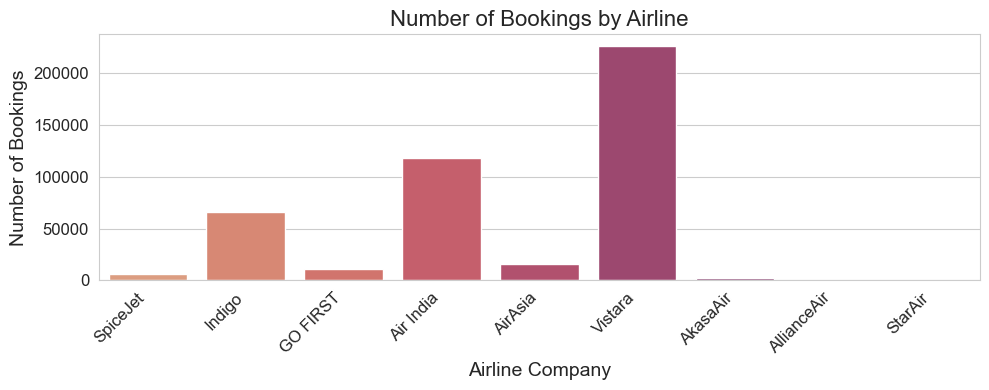

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("processed_airline_dataset.csv")

sns.set_style("whitegrid")

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Company', hue='Company', dodge=False, palette='flare')  
plt.title('Number of Bookings by Airline', fontsize=16)  
plt.xlabel('Airline Company', fontsize=14)  
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)  
plt.legend([], frameon=False) 
plt.tight_layout()  
plt.show()


Insight : Vistara tops the chart with maximum number of bookings, Air India and Indigo are also other popular ones in the list.

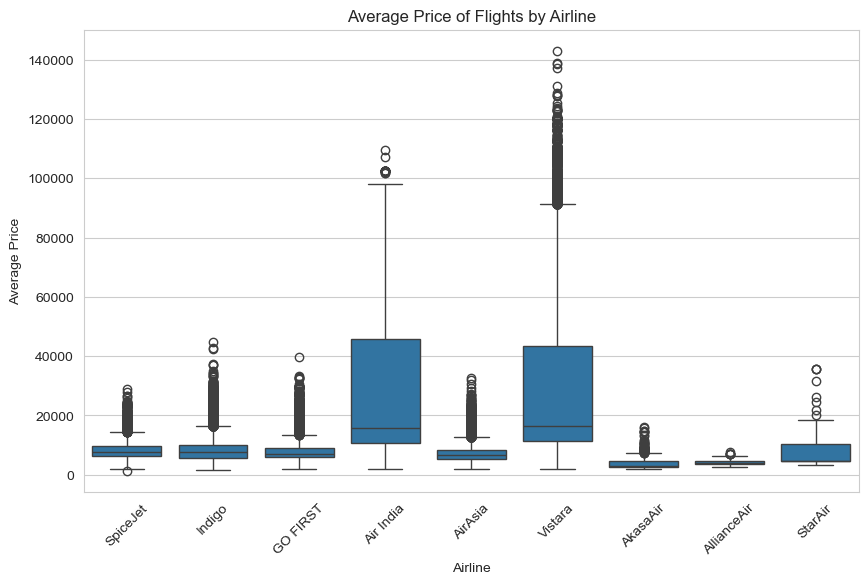

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Company', y='Price')
plt.title('Average Price of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


Vistara and Air India have the highest prices amongst all the airlines while Indigo , Spicejet , Goair and Air Asia have somewhat equal prices 

INTERESTING:  Vistara and Air India have most number of bookings even after having the highest prices.

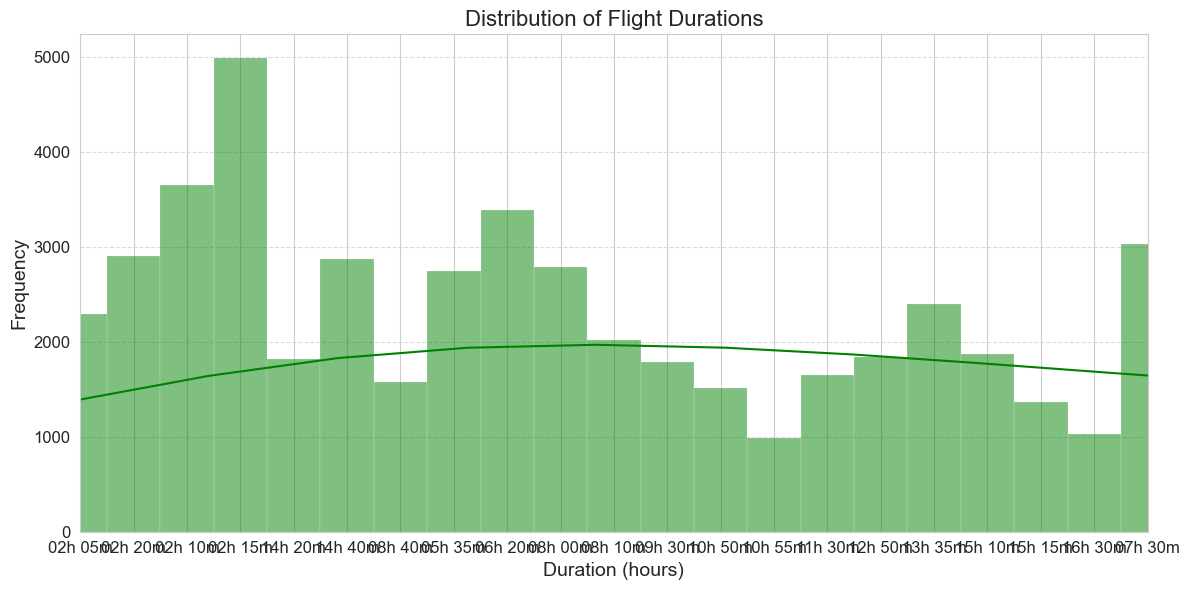

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Duration', bins=range(0, 20, 2), kde=True, color='green')
plt.title('Distribution of Flight Durations', fontsize=16)  
plt.xlabel('Duration (hours)', fontsize=14)  
plt.ylabel('Frequency', fontsize=14)  
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.xlim(0, 20)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()


In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define duration bins
duration_bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x=pd.cut(data['Duration'], bins=duration_bins), y='Price', estimator=np.mean, ci=None)
plt.title('Average Price of Flights by Duration', fontsize=16)
plt.xlabel('Duration (hours)', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0, 50000)  
plt.tight_layout()  
plt.show()


TypeError: '<' not supported between instances of 'int' and 'str'

<Figure size 1200x600 with 0 Axes>

Insight : Price Increases as the duration of the flight Increases

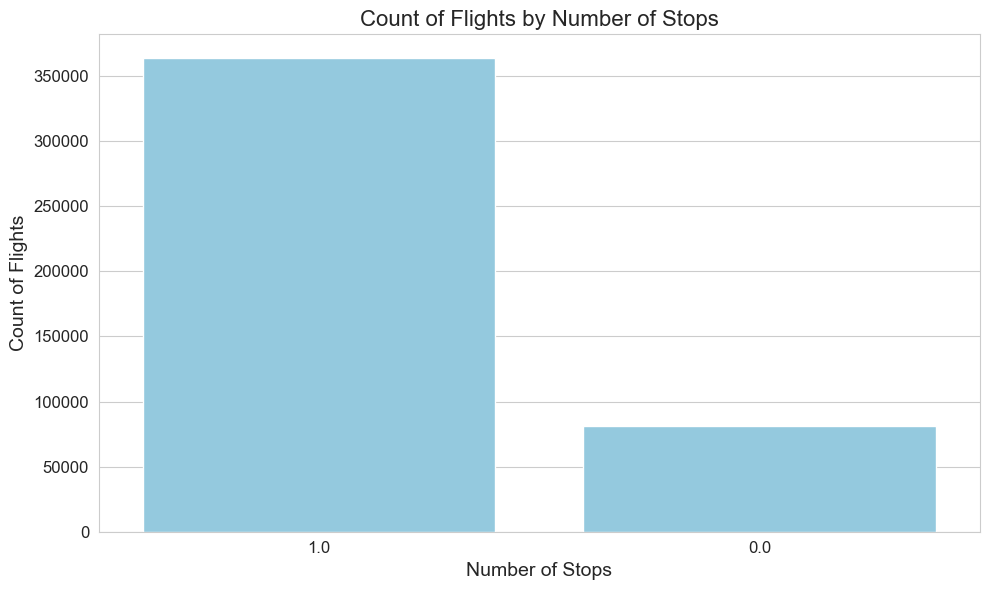

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style("whitegrid")

order = data['Total Stops'].value_counts().index

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Total Stops', order=order, color='skyblue')
plt.title('Count of Flights by Number of Stops', fontsize=16)
plt.xlabel('Number of Stops', fontsize=14)
plt.ylabel('Count of Flights', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  
plt.show()


Insight : One Stop flights are more popular than direct flights 

In [29]:
data = pd.read_csv("/kaggle/input/feature-added-dataset/featureadded_dataset.csv")
sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Total Stops', y='Price', order=order, color='green')
plt.title('Average Price of Flights by Number of Stops')
plt.xlabel('Number of Stops')
plt.ylabel('Average Price')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/feature-added-dataset/featureadded_dataset.csv'

Insight : Direct Flights have lowest Prices as compared to the flights which have one or two stops

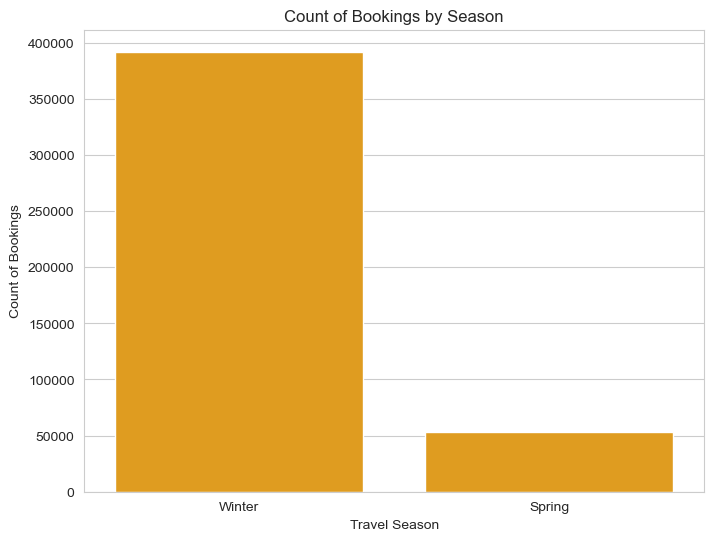

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='TravelSeason', color='orange')
plt.title('Count of Bookings by Season')
plt.xlabel('Travel Season')
plt.ylabel('Count of Bookings')
plt.show()


In [25]:
import pandas as pd
import plotly.express as px

data = pd.read_csv("/kaggle/input/feature-added-dataset/featureadded_dataset.csv")

fig1 = px.box(data, x='DepartureHour', y='Price', color='Company', template='simple_white')
fig1.update_layout(title='Departure Time Vs Ticket Price', xaxis_title='DepartureHour', yaxis_title='Price')
fig1.show()

fig2 = px.box(data, x='ArrivalHour', y='Price', color='Company', template='simple_white')
fig2.update_layout(title='Arrival Time Vs Ticket Price', xaxis_title='ArrivalHour', yaxis_title='Price')
fig2.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



INSIGHTS :
Departure Time:

Night Flights: Generally the most expensive. Airlines know some travelers prefer night flights and are willing to pay a premium for convenience or to maximize their time at their destination.
Early Morning, Morning, and Evening Flights: These times are often priced similarly. They cater to a wider range of travelers and may offer a good balance between affordability and convenience.
Late Night Flights: Often the cheapest option. Airlines might offer last-minute deals to fill empty seats on flights departing late at night.

Arrival Time:

Evening Flights: Can be more expensive, especially for business travelers who want to arrive at their destination ready for meetings the next day.
Morning and Night Flights: Typically priced similarly. Morning flights offer the benefit of arriving early at your destination, while night flights might be cheaper but less convenient.
Late Night Flights: Similar to late-night departures, these can be the cheapest option, especially if they coincide with less desirable departure times.

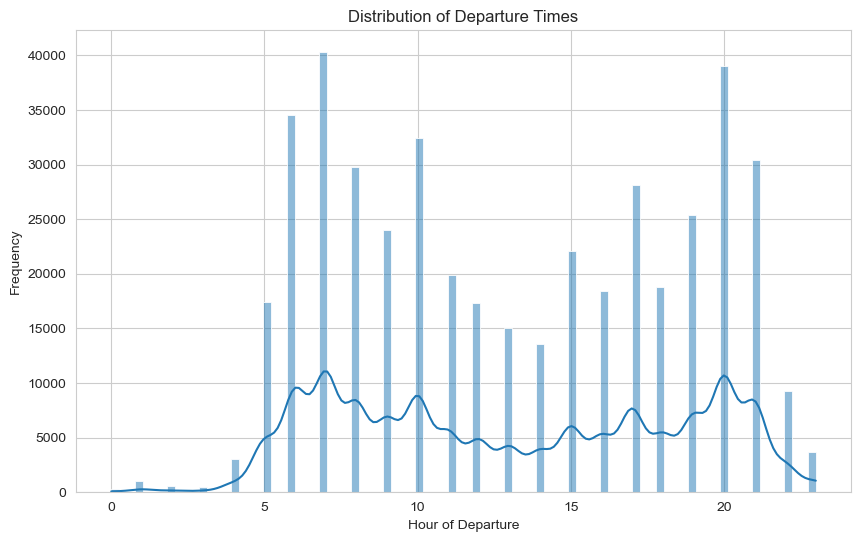

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='DepartureHour', kde=True)
plt.title('Distribution of Departure Times')
plt.xlabel('Hour of Departure')
plt.ylabel('Frequency')
plt.show()


Here's a look at flight departure patterns:

Rush Hour in the Sky:

Sunrise and Sunset: The highest number of departures happen around 6 am in the morning and 8 pm in the evening. This timeframe, between 6 am and 9 pm, sees the most air traffic, catering to various traveler needs.
Tranquility at the Terminals:

Late Nights and Early Mornings: Things quiet down significantly outside of these peak hours. Late nights (post-9 pm) and very early mornings (pre-6 am) experience far fewer departures, offering a calmer airport experience for those willing to fly during these less popular times.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



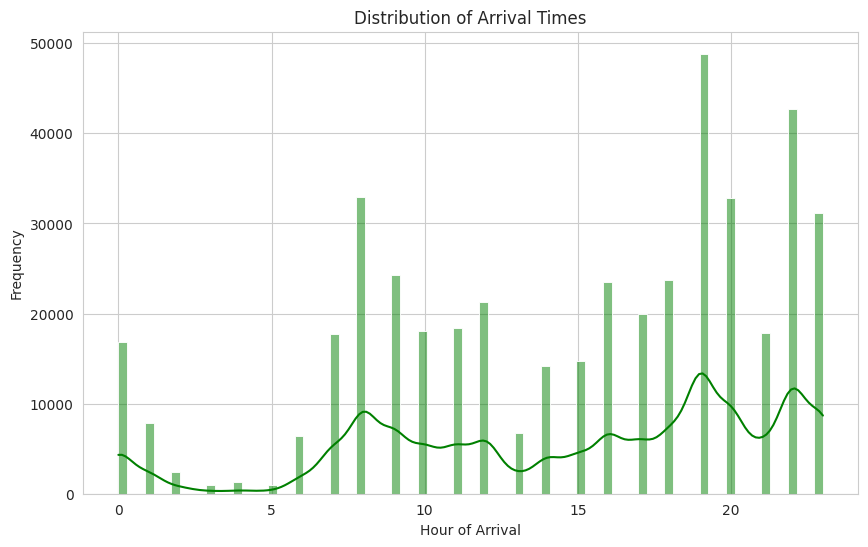

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='ArrivalHour', kde=True, color='green')
plt.title('Distribution of Arrival Times')
plt.xlabel('Hour of Arrival')
plt.ylabel('Frequency')
plt.show()


Heres the Insight at flight arrival Times : 
Busy Skies at Midday: Most flights land between noon and 6 pm, with the peak happening around 3 pm. Prepare for potentially crowded airports during this timeframe.
Steady Arrivals in the Morning: The morning hours, from 7 am to noon, see a consistent stream of arrivals, offering a good balance between avoiding peak congestion and early morning commutes.
Quiet Landings After Dark: Late evenings and overnight hours offer a calmer experience. Arrivals are infrequent between 1 am and 4 am, making these times ideal for travelers who prefer a more relaxed airport environment.

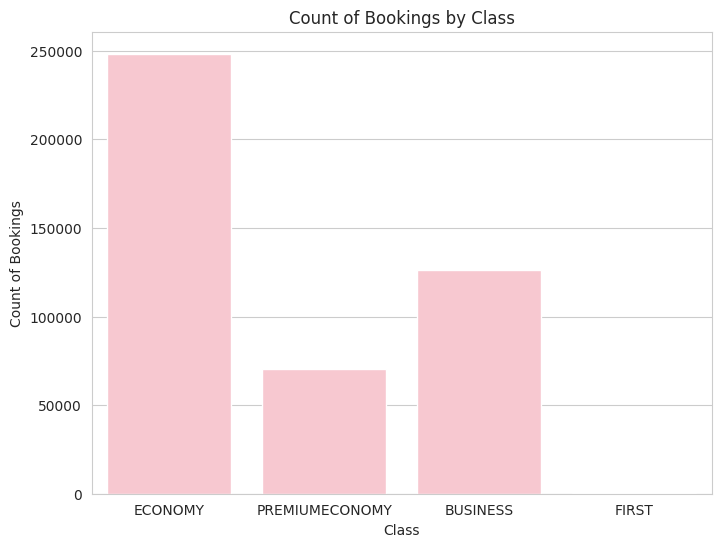

In [28]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Class', color ='pink')
plt.title('Count of Bookings by Class')
plt.xlabel('Class')
plt.ylabel('Count of Bookings')
plt.show()


Economy Reigns Supreme, But Business Outshines Premium

Despite economy class being the clear leader in terms of bookings, a fascinating trend emerges: business class sees more bookings than premium economy. First class remains the least booked option.

In [29]:
import pandas as pd
import plotly.express as px


class_counts = data['Class'].value_counts()

class_counts_df = pd.DataFrame({'Class': class_counts.index, 'Count': class_counts.values})

fig = px.pie(class_counts_df, values='Count', names='Class', hole=0.3)
fig.update_layout(title='Percentage Distribution of Classes', font=dict(size=12))
fig.show()


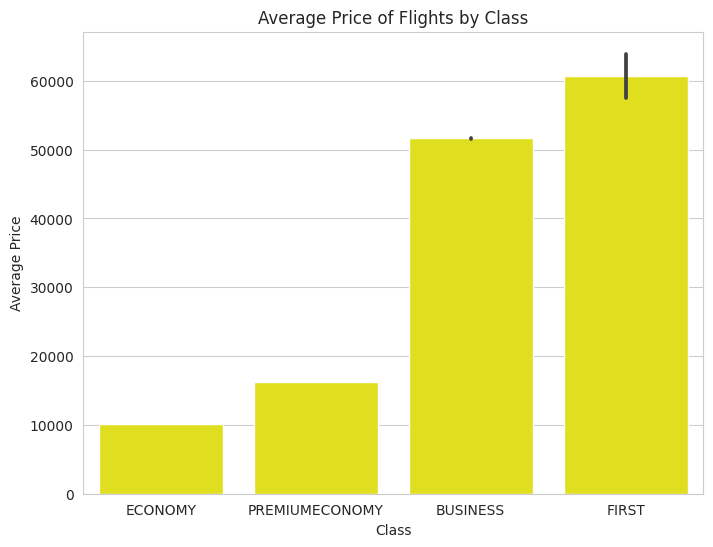

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Class', y='Price', color = 'yellow')
plt.title('Average Price of Flights by Class')
plt.xlabel('Class')
plt.ylabel('Average Price')
plt.show()

Insight : The more premium the cabin class (from Economy to Business to First), the steeper the price climbs.

C:\Users\user2\AppData\Local\Temp\ipykernel_35500\3242880231.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Source', y='Price', data=data_filtered, palette="flare")


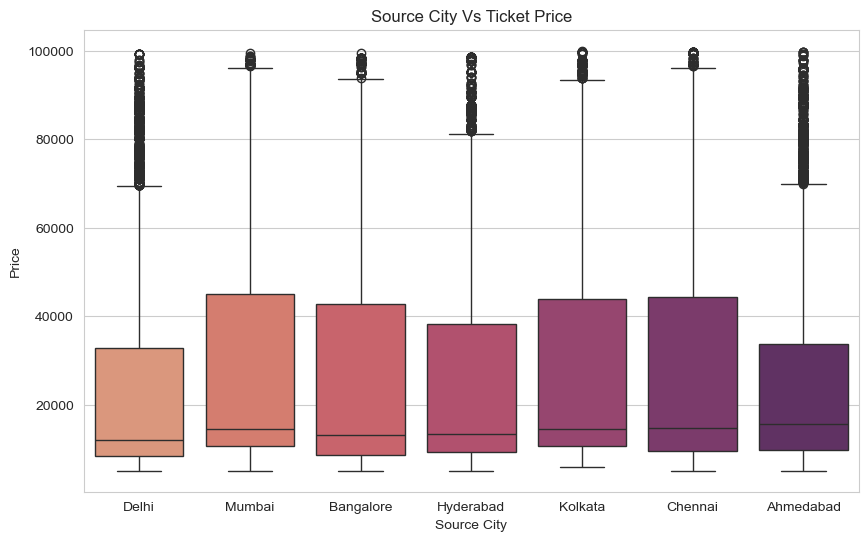

C:\Users\user2\AppData\Local\Temp\ipykernel_35500\3242880231.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Destination', y='Price', data=data_filtered, palette="flare")


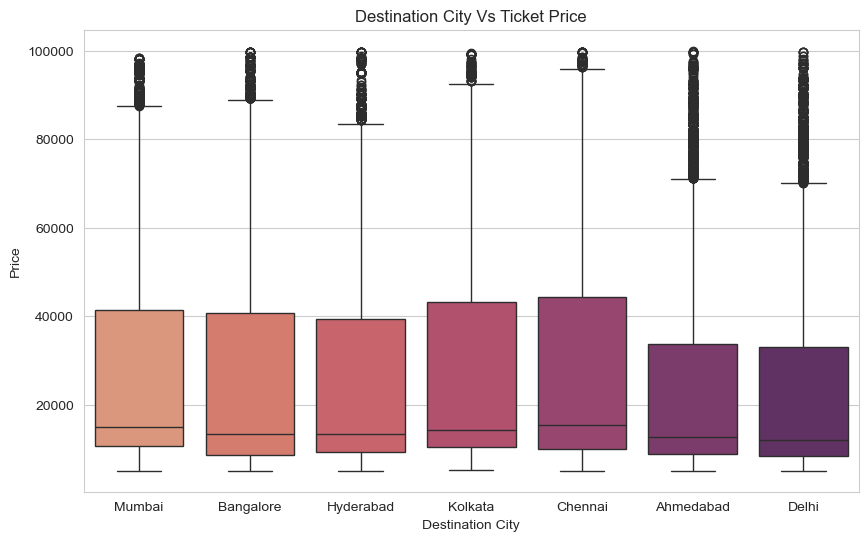

In [59]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Read the data

# Filter data based on price range
data_filtered = data[(data['Price'] >= 5000) & (data['Price'] <= 100000)]
sns.set_style("whitegrid")

# Box plot for Source City vs Ticket Price
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='Source', y='Price', data=data_filtered, palette="flare")
plt.title('Source City Vs Ticket Price')
plt.xlabel('Source City')
plt.ylabel('Price')
plt.show()

# Box plot for Destination City vs Ticket Price
plt.figure(figsize=(10, 6))  # Set the figure size
sns.boxplot(x='Destination', y='Price', data=data_filtered, palette="flare")
plt.title('Destination City Vs Ticket Price')
plt.xlabel('Destination City')
plt.ylabel('Price')
plt.show()


Source City v/s Ticket Price 
Cities with Highest Average Ticket Prices: Flights departing from Delhi appear to have the most expensive tickets, followed by Mumbai and Bangalore.
Cities with Lowest Average Ticket Prices: Flights departing from Kolkata appear to have the least expensive tickets, with Chennai and Ahmedabad following closely.

Destination City v/s Ticket Price 

 Cities with Highest Average Ticket Prices: Flights to Kolkata and Chennai tend to be the most expensive on this chart.
 Flights to Mumbai and Bangalore have similar prices, neither being the cheapest nor the most expensive.
 Cities with Lowest Average Ticket Prices:  Delhi appears to be the most budget-friendly destination among the ones listed.


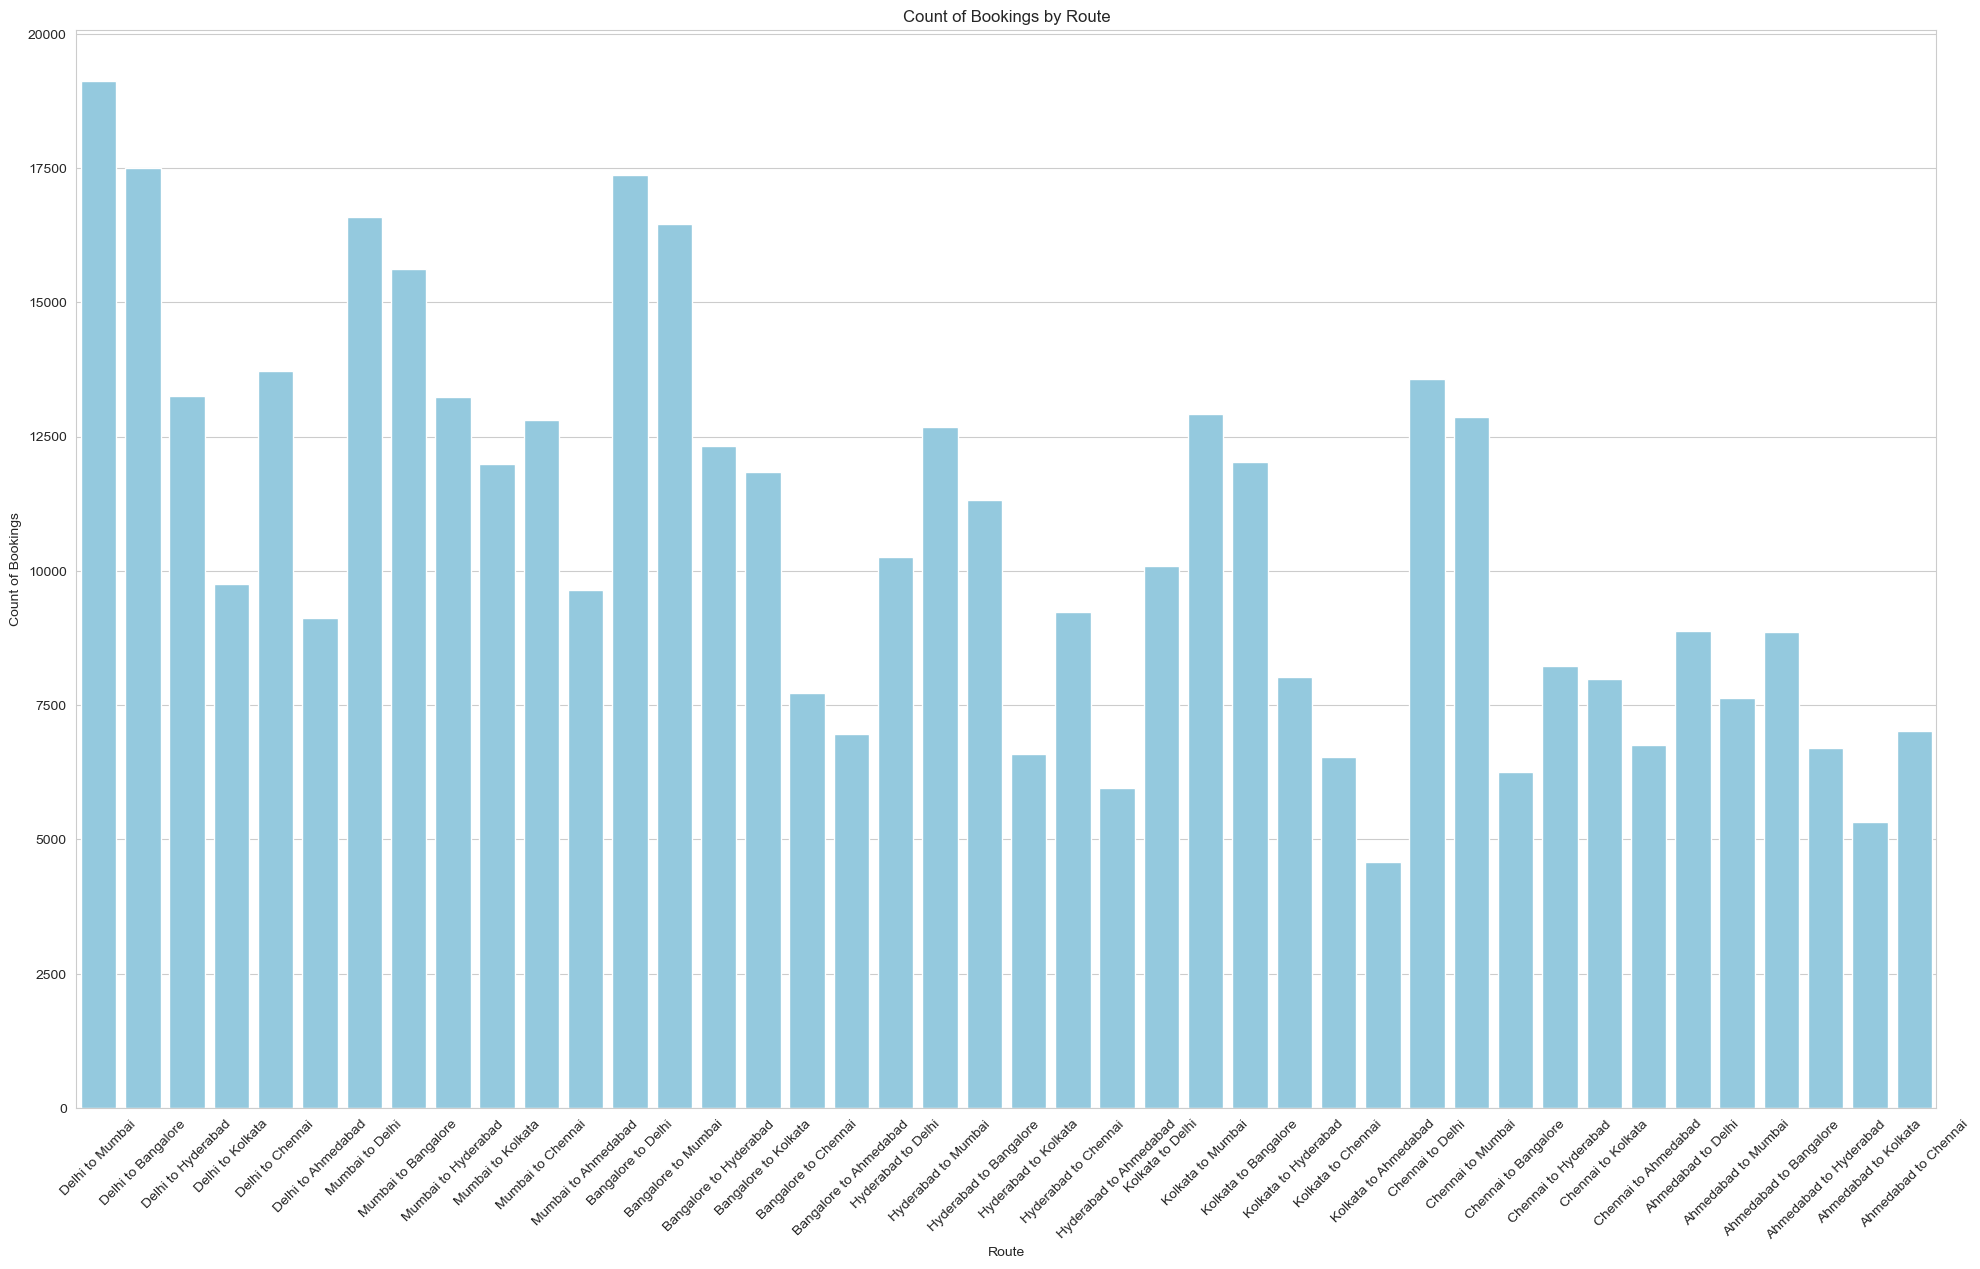

In [60]:
sns.set_style("whitegrid")
plt.figure(figsize=(24, 14))
sns.countplot(data=data, x='Possible Routes', color='skyblue')
plt.title('Count of Bookings by Route')
plt.xlabel('Route')
plt.ylabel('Count of Bookings')
plt.xticks(rotation=45)
plt.show()


The busiest route, with the most flights or passengers, is between Delhi and Mumbai.
 The least traveled route is from Kolkata to Ahmedabad. 
 Other well-traveled routes include:
    * Delhi to Hyderabad
    * Flights in both directions between Delhi and Mumbai 
    * Flights in both directions between Bangalore and Mumbai 
    * Bangalore to Delhi


C:\Users\user2\AppData\Local\Temp\ipykernel_35500\2984666748.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Possible Routes', y='Price', palette=colors)
C:\Users\user2\AppData\Local\Temp\ipykernel_35500\2984666748.py:12: UserWarning: 
The palette list has fewer values (6) than needed (42) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=data, x='Possible Routes', y='Price', palette=colors)


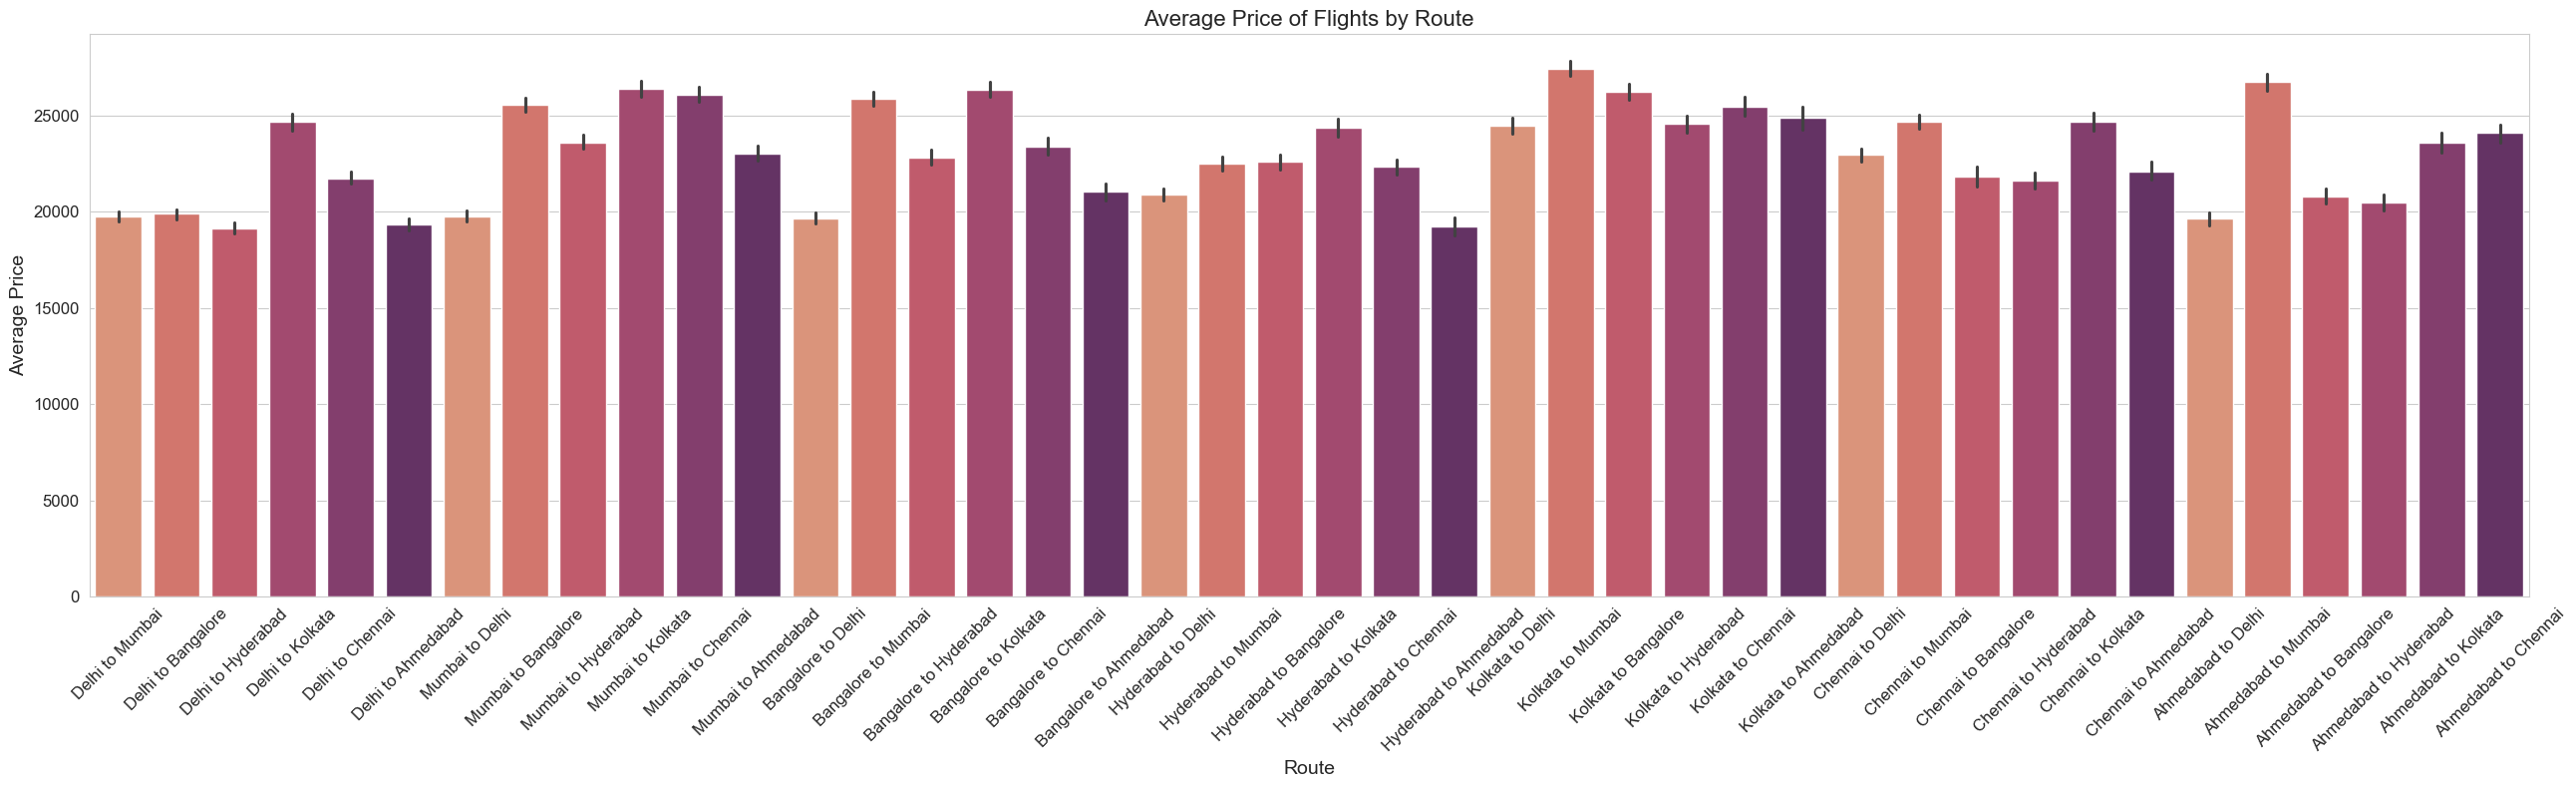

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Set the seaborn style and color palette
sns.set_style("whitegrid")
colors = sns.color_palette("flare")

# Create the bar plot
plt.figure(figsize=(26, 8))
sns.barplot(data=data, x='Possible Routes', y='Price', palette=colors)
plt.title('Average Price of Flights by Route', fontsize=16)
plt.xlabel('Route', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout() 
plt.show()


Routes v/s Average Prices 
The most expensive route appears to be Kolkata (CCU) to Ahmedabad (AMD).
Flights departing from Delhi (DEL) seem to be generally cheaper than flights from other cities. This is especially evident for routes like DEL to BOM, DEL to HYD, and DEL to BLR.
Flights between major cities in South India, including Bangalore (BLR), Hyderabad (HYD), Chennai (MAA), and Kolkata (CCU) appear to have a similar price range.

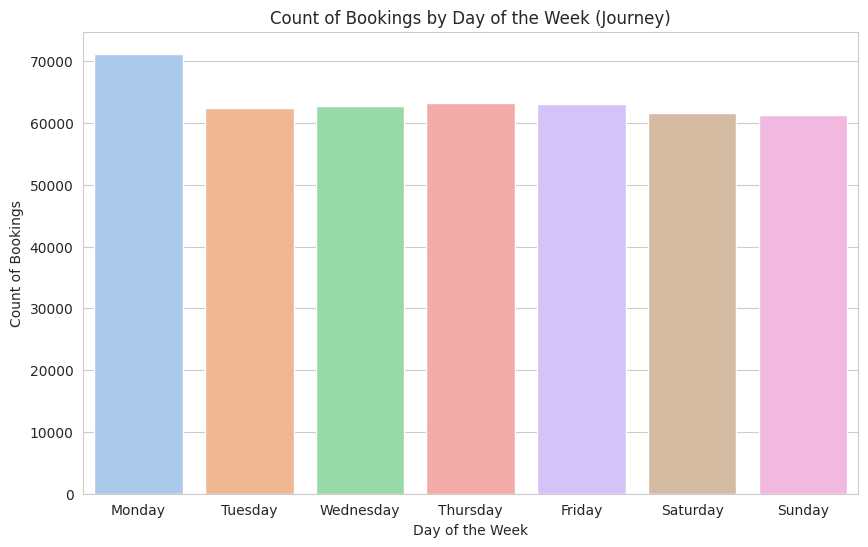

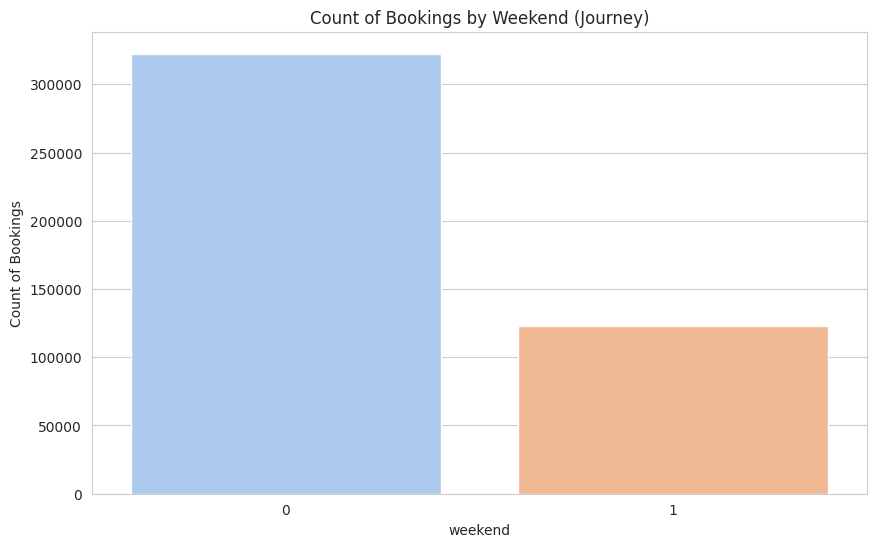

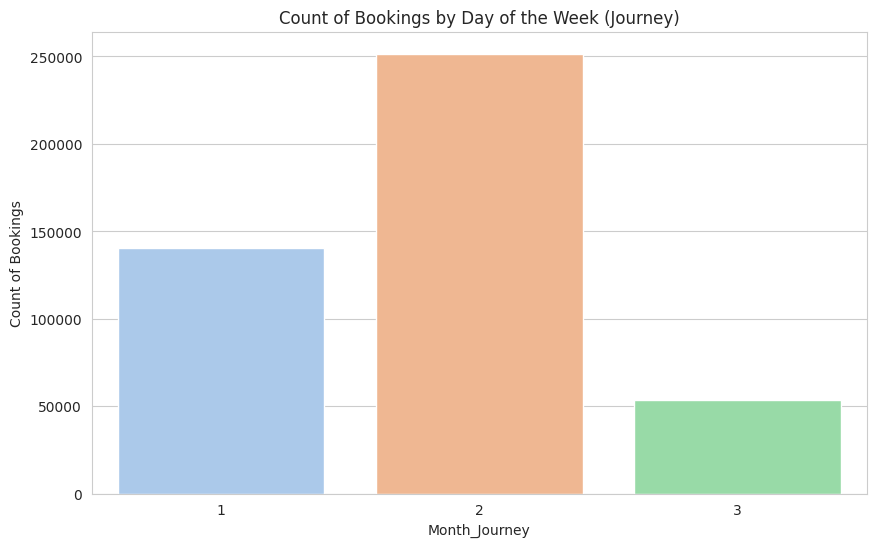

In [34]:
sns.set_style("whitegrid")
colors = sns.color_palette("flare")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayOfWeek_Journey', palette='pastel')
plt.title('Count of Bookings by Day of the Week (Journey)')
plt.xlabel('Day of the Week')
plt.ylabel('Count of Bookings')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weekend',palette='pastel')
plt.title('Count of Bookings by Weekend (Journey)')
plt.xlabel('weekend')
plt.ylabel('Count of Bookings')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month_Journey',palette='pastel')
plt.title('Count of Bookings by Day of the Week (Journey)')
plt.xlabel('Month_Journey')
plt.ylabel('Count of Bookings')
plt.show()


Even though the number of bookings stays fairly consistent throughout the week, Mondays see the most flights booked for the actual travel day.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



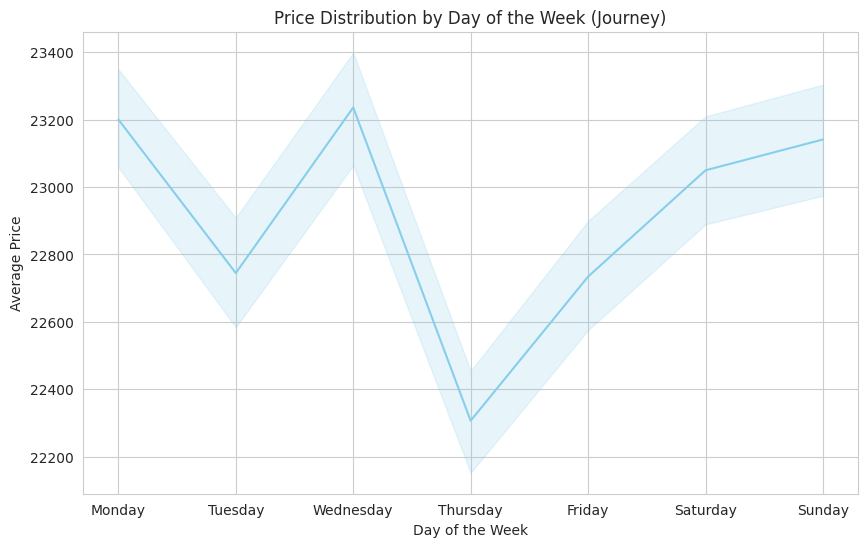

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



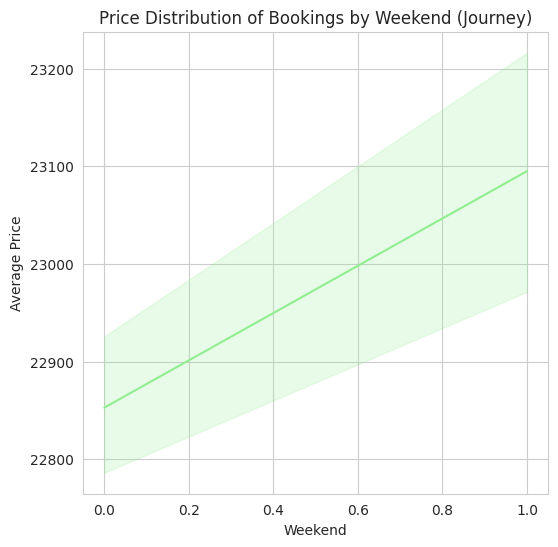

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='DayOfWeek_Journey', y='Price', color='skyblue')
plt.title('Price Distribution by Day of the Week (Journey)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.show()


plt.figure(figsize=(6, 6))
sns.lineplot(data=df, x='Weekend', y='Price', color='lightgreen')
plt.title('Price Distribution of Bookings by Weekend (Journey)')
plt.xlabel('Weekend')
plt.ylabel('Average Price')
plt.show()


Insights : Flight prices are generally higher at the beginning of the week, on Mondays and Tuesdays.
Prices then tend to decrease throughout the week, reaching a low point on  thursdays and then tending to rise on Saturdays and Sundays.

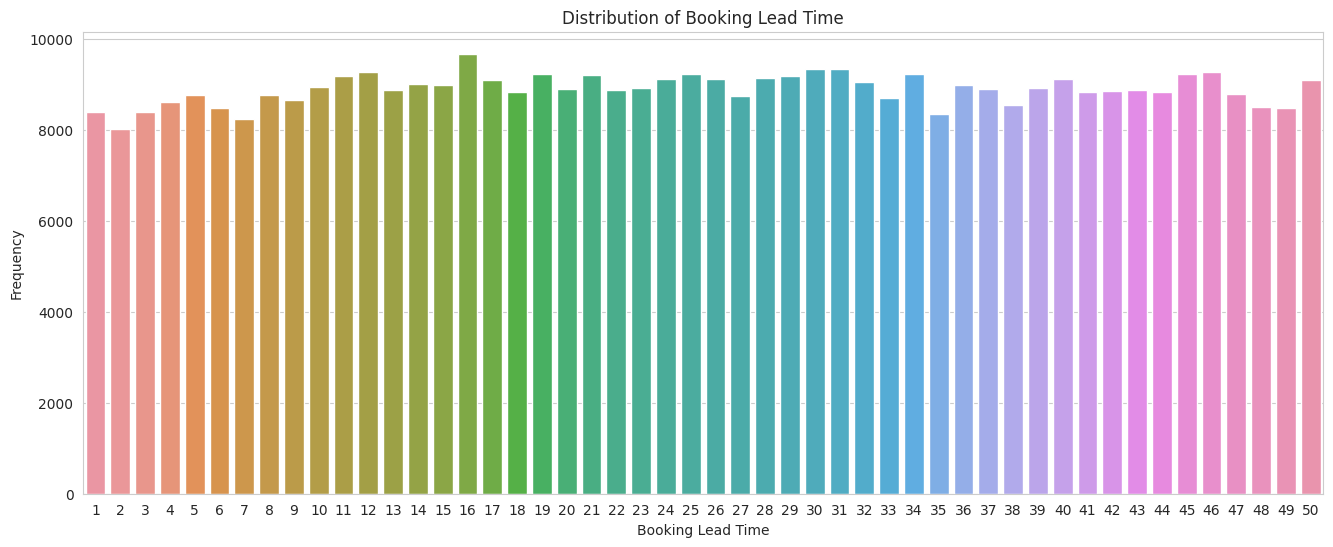

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



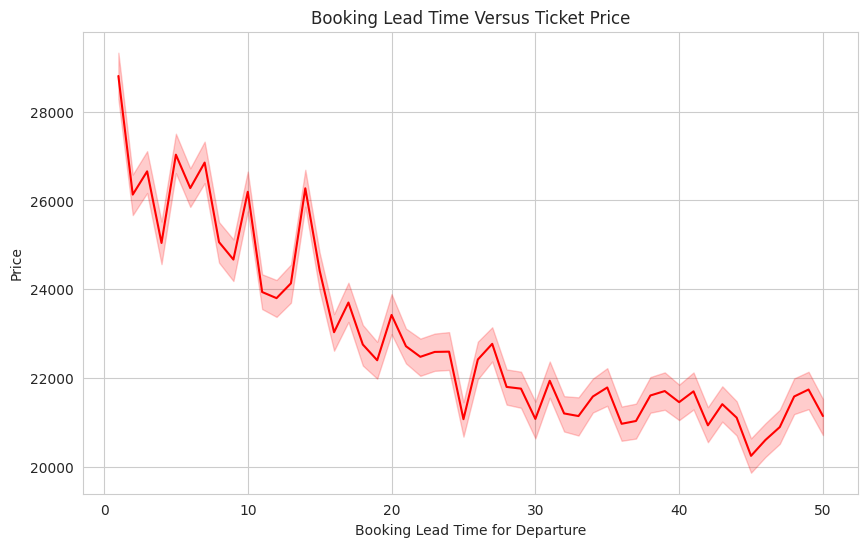

In [36]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='BookingLeadTime')
plt.title('Distribution of Booking Lead Time')
plt.xlabel('Booking Lead Time')
plt.ylabel('Frequency')
plt.show()



plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='BookingLeadTime',y='Price',color='red')
plt.title('Booking Lead Time Versus Ticket Price')
plt.xlabel('Booking Lead Time for Departure')
plt.ylabel('Price',)
plt.show()

Insights :
People tend to book their flights fairly consistently throughout the booking window you've shown (e.g., 60 days before departure). There isn't a huge difference in how many bookings are made on any particular day to book.
However, the sweet spot seems to be around 15 days before departure. That's when we see the most bookings happening. The closer you get to the departure date (within 2 days), the fewer bookings there are.
This trend goes hand-in-hand with price. As the departure date approaches and there are fewer seats available, the price tends to go up. So, booking flights earlier (around the 15-day mark) might get you a better deal.

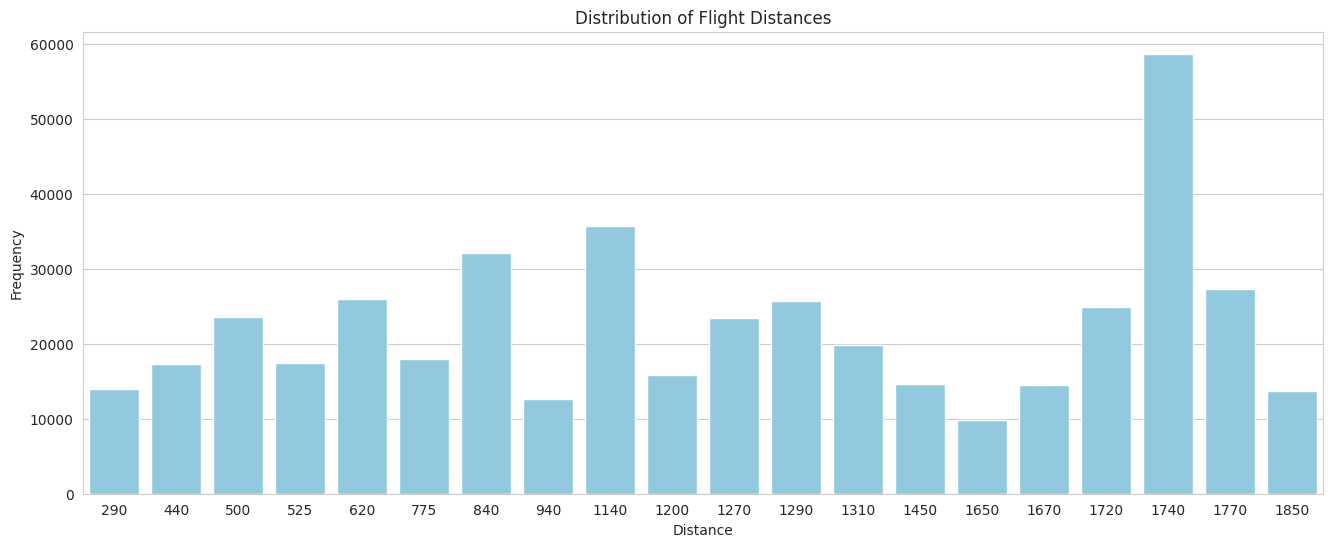

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



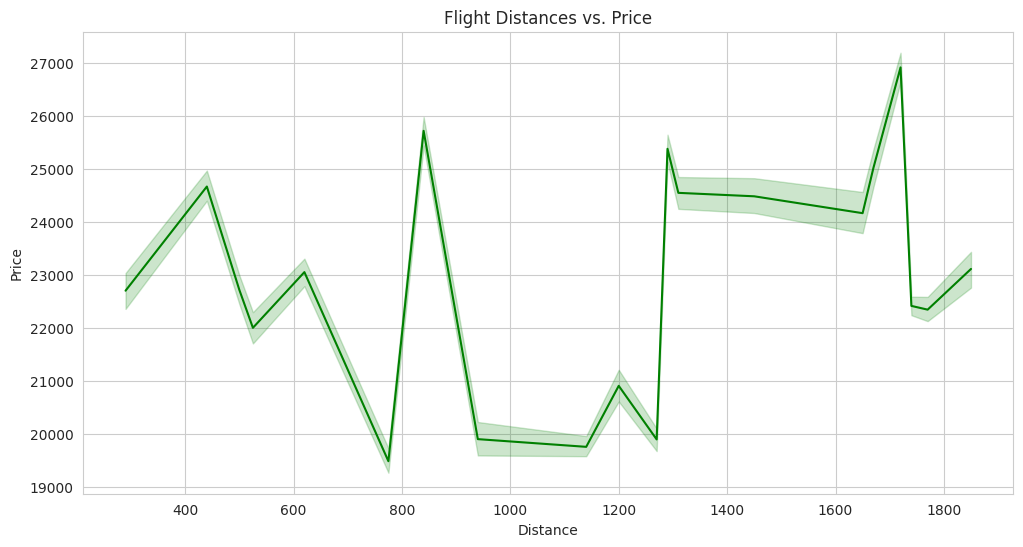

In [37]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='Distance', color='skyblue')
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

data_filtered = data[(data['Price'] >= 5000) & (data['Price'] <= 100000)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Distance', y='Price', color='green')
plt.title('Flight Distances vs. Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()


There are a significant number of flights for all the distance ranges shown, which suggests that there is a mix of short-haul, medium-haul, and long-haul flights within the United States.
The number of flights gradually decreases as the distance range increases. This means that there are fewer flights between airports that are further apart.
here are a few data points that fall below the general trend line. This means that some short flights are more expensive than some long flights. This could be due to a number of factors, such as:
The specific route: Flights on routes with high demand or limited competition may be more expensive, even for short distances.
The airline: Some airlines may charge more than others for similar routes and distances.
The time of year: Flights during peak travel seasons may be more expensive, even for short distances.
There are also a few data points that fall above the general trend line. This means that some long flights are cheaper than some short flights. This could also be due to a number of factors, such as:
Special offers or discounts on long flights
Airlines competing heavily on a particular long route

(5) Preparing Data For Model Training 
   

In [62]:
#Preparing data for Model Training

cleaned_df = data.dropna()

In [63]:

for column in cleaned_df.columns:
    unique_values = cleaned_df[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in Date of Booking: ['15/01/2023']
Unique values in Date of Journey: ['16/01/2023' '17/01/2023' '18/01/2023' '19/01/2023' '20/01/2023'
 '21/01/2023' '22/01/2023' '23/01/2023' '24/01/2023' '25/01/2023'
 '26/01/2023' '27/01/2023' '28/01/2023' '29/01/2023' '30/01/2023'
 '31/01/2023' '01/02/2023' '02/02/2023' '03/02/2023' '04/02/2023'
 '05/02/2023' '06/02/2023' '07/02/2023' '08/02/2023' '09/02/2023'
 '10/02/2023' '11/02/2023' '12/02/2023' '13/02/2023' '14/02/2023'
 '15/02/2023' '16/02/2023' '17/02/2023' '18/02/2023' '19/02/2023'
 '20/02/2023' '21/02/2023' '22/02/2023' '23/02/2023' '24/02/2023'
 '25/02/2023' '26/02/2023' '27/02/2023' '28/02/2023' '01/03/2023'
 '02/03/2023' '03/03/2023' '04/03/2023' '05/03/2023' '06/03/2023']
Unique values in Airline-Class: ['SpiceJet \nSG-8169\nECONOMY' 'Indigo \n6E-2519\nECONOMY'
 'GO FIRST \nG8- 354\nECONOMY' ... 'Indigo \n6E-6493\nECONOMY'
 'Indigo \n6E-7073\nECONOMY' 'Indigo \n6E- 348\nECONOMY']
Unique values in Duration: ['02h 05m' '02h 2

In [64]:
data.columns

Index(['Date of Booking', 'Date of Journey', 'Airline-Class', 'Duration',
       'Total Stops', 'Price', 'Company', 'FlightNumber', 'Class',
       'DepartureTime', 'Source', 'ArrivalTime', 'Destination',
       'DayOfWeek_Booking', 'DayOfWeek_Journey', 'Month_Journey', 'Weekend',
       'BookingLeadTime', 'DepartureHour', 'ArrivalHour', 'IsEconomyClass',
       'IsBusinessClass', 'IsFirstClass', 'TravelSeason', 'Possible Routes',
       'Distance', 'Departure_TimeOfDay', 'Arrival_TimeOfDay'],
      dtype='object')

In [65]:
#Preprocessing the data
# Retaining only the selected columns
columns_to_keep = [
    'Airline-Class', 'Total Stops', 'Source', 'Destination',
    'DayOfWeek_Journey', 'Month_Journey', 'Departure_TimeOfDay', 
    'Arrival_TimeOfDay', 'IsEconomyClass', 'IsBusinessClass', 
    'IsFirstClass', 'BookingLeadTime', 'Duration', 'Distance', 'Price'
]
final_data = data[columns_to_keep]


In [66]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445366 entries, 0 to 445365
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Airline-Class        445366 non-null  object 
 1   Total Stops          445366 non-null  float64
 2   Source               445366 non-null  object 
 3   Destination          445366 non-null  object 
 4   DayOfWeek_Journey    445366 non-null  object 
 5   Month_Journey        445366 non-null  int64  
 6   Departure_TimeOfDay  445366 non-null  object 
 7   Arrival_TimeOfDay    445366 non-null  object 
 8   IsEconomyClass       445366 non-null  int64  
 9   IsBusinessClass      445366 non-null  int64  
 10  IsFirstClass         445366 non-null  int64  
 11  BookingLeadTime      445366 non-null  int64  
 12  Duration             445366 non-null  object 
 13  Distance             445366 non-null  int64  
 14  Price                445366 non-null  int64  
dtypes: float64(1), in

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer


In [71]:
data['Duration'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 445366 entries, 0 to 445365
Series name: Duration
Non-Null Count   Dtype 
--------------   ----- 
445366 non-null  object
dtypes: object(1)
memory usage: 3.4+ MB


In [9]:
def convert_duration(duration):
    try:
        hours, minutes = duration.split('h ')
        hours = int(hours)
        minutes = int(minutes[:-1])  # Remove 'm' and convert to integer
        total_duration = hours + minutes / 60
        return total_duration
    except Exception as e:
        return np.nan

# Apply duration conversion
data['Duration'] = data['Duration'].apply(convert_duration)

In [10]:
data['Duration'].isnull().sum()

0

In [3]:
import pandas as pd
import numpy as np

# Read the data
data = pd.read_csv('processed_airline_dataset.csv')

# Extract just the class from Airline-Class column
data['Class'] = data['Class'].astype(str)

# Convert Duration to hours
data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)

# Select numerical and clean categorical columns
features = ['Duration', 'Total Stops', 'Price', 'BookingLeadTime', 
           'DepartureHour', 'ArrivalHour', 'Distance', 'IsEconomyClass', 
           'IsBusinessClass', 'IsFirstClass']

# Create clean dataset
clean_data = data[features]

print("Clean dataset preview:")
print(clean_data.head())
print("\
Data types:")
print(clean_data.dtypes)

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\abhis\AppData\Local\Temp\ipykernel_5376\2957323122.py:11: SyntaxWarning: invalid escape sequence '\d'
  data['Duration'] = data['Duration'].str.extract('(\d+)').astype(float)


Clean dataset preview:
   Duration  Total Stops  Price  BookingLeadTime  DepartureHour  ArrivalHour  \
0       2.0          0.0   5335                1             20           22   
1       2.0          0.0   5899                1             23            1   
2       2.0          0.0   5801                1             22            0   
3       2.0          0.0   5794                1             18           20   
4       2.0          0.0   5955                1             20           22   

   Distance  IsEconomyClass  IsBusinessClass  IsFirstClass  
0      1140               1                0             0  
1      1140               1                0             0  
2      1140               1                0             0  
3      1140               1                0             0  
4      1140               1                0             0  
Data types:
Duration           float64
Total Stops        float64
Price                int64
BookingLeadTime      int64
DepartureH

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features (X) and target (y)
X = clean_data.drop(columns=['Price'])
y = clean_data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Model training complete.")
print("Mean Squared Error on test data:", mse)

Model training complete.
Mean Squared Error on test data: 37493132.364301465


In [ ]:
from sklearn.model_selection import GridSearchCV
import joblib

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                              param_grid=param_grid, 
                              cv=3, 
                              n_jobs=-1, 
                              scoring='neg_mean_squared_error')

rf_grid_search.fit(X_train, y_train)

# Get the best model and evaluate it
best_rf_model = rf_grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)

# Save the model as a .pkl file
joblib.dump(best_rf_model, 'best_rf_model.pkl')

print("Hyperparameter tuning complete.")
print("Best parameters:", rf_grid_search.best_params_)
print("Mean Squared Error with best model:", mse_best)
print("Model saved as 'best_rf_model.pkl'.")

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import joblib
import numpy as np

# Print starting message
print("Starting Random Forest hyperparameter tuning...")

# Step 1: Define the parameter grid with focused ranges
print("Defining the parameter grid for RandomizedSearchCV...")
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
print("Parameter grid defined.")

# Step 2: Initialize RandomizedSearchCV
print("Initializing RandomizedSearchCV with RandomForestClassifier...")
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=50,  # Reduce iterations for speed
    cv=3,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)
print("RandomizedSearchCV initialized.")

# Step 3: Fit the model with the training data
print("Fitting the model to the training data... This may take some time.")
rf_random_search.fit(X_train, y_train)
print("Model fitting complete.")

# Step 4: Retrieve the best model
print("Extracting the best model from RandomizedSearchCV...")
best_rf_model = rf_random_search.best_estimator_
print(f"Best parameters found: {rf_random_search.best_params_}")

# Step 5: Evaluate the best model
print("Evaluating the best model on the test set...")
y_pred_best = best_rf_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy of the best model: {accuracy_best * 100:.2f}%")

# Save the model if accuracy is high
if accuracy_best >= 0.99:  # 99% threshold
    print("Accuracy is above 99%. Saving the model as a .pkl file...")
    joblib.dump(best_rf_model, 'best_rf_model.pkl')
    print("Model saved successfully as 'best_rf_model.pkl'.")
else:
    print("Accuracy below 99%. Model not saved.")

# Final message
print("Hyperparameter tuning and model evaluation process complete!")


Starting Random Forest hyperparameter tuning...
Defining the parameter grid for RandomizedSearchCV...
Parameter grid defined.
Initializing RandomizedSearchCV with RandomForestClassifier...
RandomizedSearchCV initialized.
Fitting the model to the training data... This may take some time.


C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
